<a href="https://colab.research.google.com/github/SaadRana17/DL/blob/main/Assignment_1_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


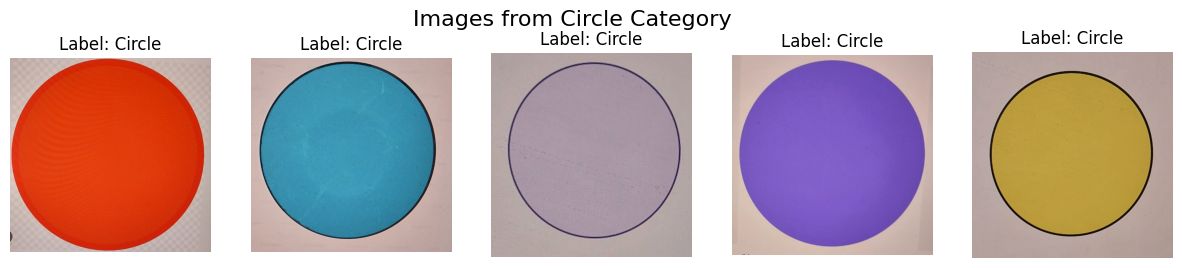

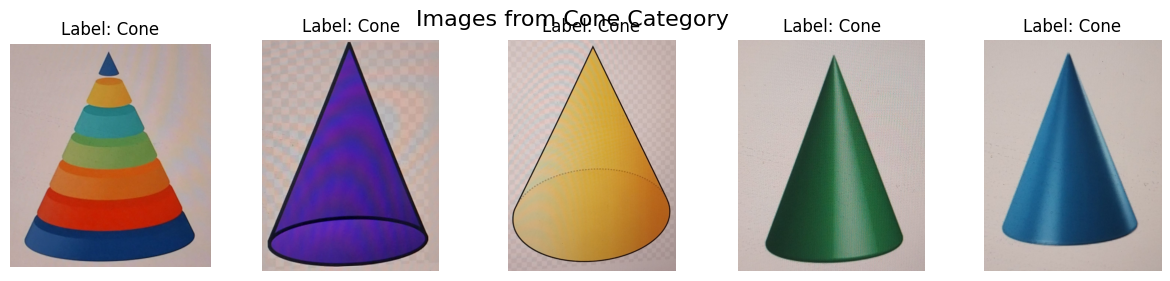

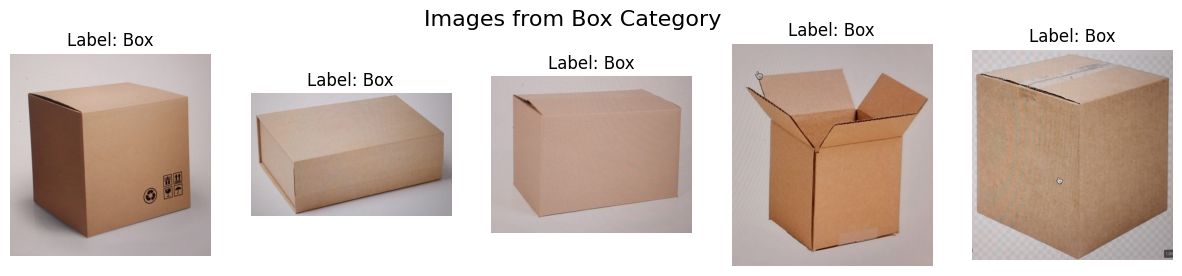

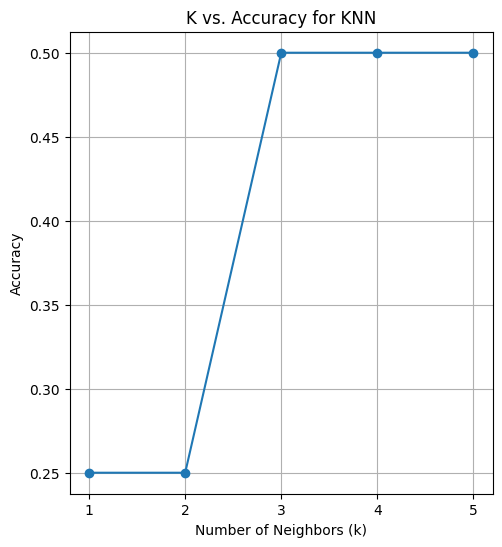

In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Define the path to your Google Drive folder where images are stored
data_dir = '/content/drive/MyDrive/Dataset'

# Initialize lists to store image data and labels
data = []
labels = []

# Loop through each category and load the images with labels
categories = os.listdir(data_dir)
for category_id, category in enumerate(categories):
    category_path = os.path.join(data_dir, category)

    if not os.path.isdir(category_path):  # Skip non-directory files
        continue

    for image_file in os.listdir(category_path):
        if not image_file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif')): # Skip non-image files
            continue

        image_path = os.path.join(category_path, image_file)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (64, 64))  # Resize the image to a fixed size
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
        image = image.flatten()  # Flatten the image into a 1D array
        data.append(image)
        labels.append(category)

# Create NumPy arrays for data and labels
X = np.array(data)
y = np.array(labels)

# Define the KNN function
def knn_predict(X_train, y_train, X_test, k=3):
    y_pred = []
    for test_sample in X_test:
        distances = np.sqrt(np.sum((X_train - test_sample) ** 2, axis=1))
        nearest_indices = np.argsort(distances)[:k]
        nearest_labels = y_train[nearest_indices]
        most_common_label = Counter(nearest_labels).most_common(1)[0][0]
        y_pred.append(most_common_label)
    return np.array(y_pred)

# Split the data into training and testing sets (adjust the split ratio as needed)
split_ratio = 0.8
split_index = int(X.shape[0] * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Define a range of k values to test
k_values = range(1, 6)
accuracies = []

# Calculate accuracy for each value of k
for k in k_values:
    y_pred = knn_predict(X_train, y_train, X_test, k)
    accuracy = np.mean(y_pred == y_test)
    accuracies.append(accuracy)

# Display images from each folder separately with labels
for category in categories:
    category_path = os.path.join(data_dir, category)

    if not os.path.isdir(category_path):  # Skip non-directory files
        continue

    category_images = []
    category_labels = []

    for image_file in os.listdir(category_path):
        if not image_file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif')): # Skip non-image files
            continue

        image_path = os.path.join(category_path, image_file)
        image = cv2.imread(image_path)
        category_images.append(image)
        category_labels.append(category)

    num_samples = min(len(category_images), 5)  # Display up to 5 images from each category
    plt.figure(figsize=(15, 3))
    plt.suptitle(f'Images from {category} Category', fontsize=16)

    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(cv2.cvtColor(category_images[i], cv2.COLOR_BGR2RGB))
        plt.title(f'Label: {category_labels[i]}')
        plt.axis('off')

    plt.show()

# Plot the k vs. accuracy graph
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('K vs. Accuracy for KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(k_values)

plt.show()


Accuracy of SVM: 100.00%


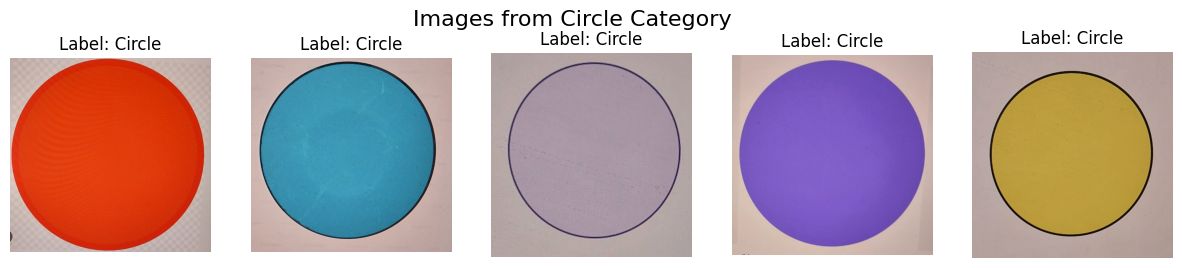

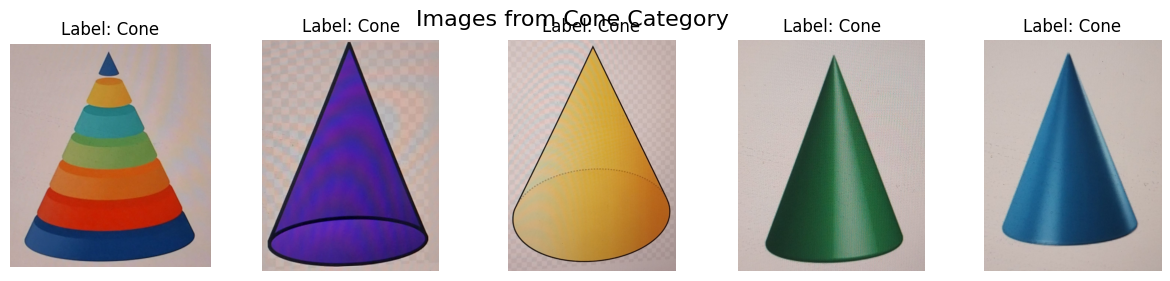

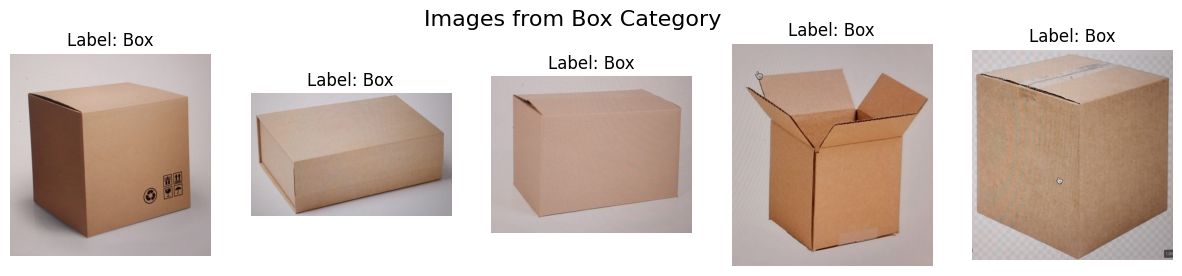

In [6]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Define the path to your Google Drive folder where images are stored
data_dir = '/content/drive/MyDrive/Dataset'

# Initialize lists to store image data and labels
data = []
labels = []

# Loop through each category and load the images with labels
categories = os.listdir(data_dir)
class_mapping = {class_name: idx for idx, class_name in enumerate(categories)}
for category_id, category in enumerate(categories):
    category_path = os.path.join(data_dir, category)

    if not os.path.isdir(category_path):  # Skip non-directory files
        continue

    for image_file in os.listdir(category_path):
        if not image_file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif')):  # Skip non-image files
            continue

        image_path = os.path.join(category_path, image_file)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (64, 64))  # Resize the image to a fixed size
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
        image = image.flatten()  # Flatten the image into a 1D array
        data.append(image)
        labels.append(class_mapping[category])

# Create NumPy arrays for data and labels
X = np.array(data)
y = np.array(labels, dtype=int)  # Convert labels to int

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(X.shape[0] * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


# Define the SVM training function (simplified linear SVM)
def train_svm(X_train, y_train, learning_rate=0.1, num_epochs=1000):
    num_samples, num_features = X_train.shape
    weights = np.zeros(num_features)
    bias = 0

    for epoch in range(1, num_epochs + 1):
        for i in range(num_samples):
            if y_train[i] * (np.dot(X_train[i], weights) + bias) >= 1:
                weights -= learning_rate * (2 / (epoch + 1) * weights)
            else:
                weights -= learning_rate * (2 / (epoch + 1) * weights - np.dot(X_train[i], y_train[i]))
                bias -= learning_rate * y_train[i]

    return weights, bias


# Train the SVM
weights, bias = train_svm(X_train, y_train)

# Define the SVM prediction function
def predict_svm(X_test, weights, bias):
    predictions = []
    for sample in X_test:
        prediction = np.sign(np.dot(sample, weights) + bias)
        predictions.append(prediction)
    return np.array(predictions)

# Make predictions on the testing data
y_pred = predict_svm(X_test, weights, bias)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy of SVM: {accuracy * 100:.2f}%')

# Display images from each folder separately with labels
for category in categories:
    category_path = os.path.join(data_dir, category)

    if not os.path.isdir(category_path):  # Skip non-directory files
        continue

    category_images = []
    category_labels = []

    for image_file in os.listdir(category_path):
        if not image_file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif')):  # Skip non-image files
            continue

        image_path = os.path.join(category_path, image_file)
        image = cv2.imread(image_path)
        category_images.append(image)
        category_labels.append(category)

    num_samples = min(len(category_images), 5)  # Display up to 5 images from each category
    plt.figure(figsize=(15, 3))
    plt.suptitle(f'Images from {category} Category', fontsize=16)

    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(cv2.cvtColor(category_images[i], cv2.COLOR_BGR2RGB))
        plt.title(f'Label: {category_labels[i]}')
        plt.axis('off')

    plt.show()
